In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import copy

In [ ]:
# img = Image.open('1.BMP')
# img.show()

img = cv2.imread("1.BMP")

(103, 96, 3)
127.5


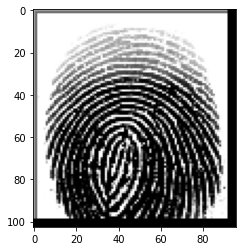

In [ ]:
img_array=np.array(img)
print(img_array.shape)
#Verifying whether the image is in b/w
Max=0
for i in range(103):
  for j in range(96):
    Max=max(Max,img_array[i,j,0])
    if img_array[i,j,0]==img_array[i,j,1] and img_array[i,j,1]==img_array[i,j,2]:
      continue;
    else:
      print(img_array[i,j,0],img_array[i,j,1],img_array[i,j,2])
print(Max/2)
plt.imshow(img)

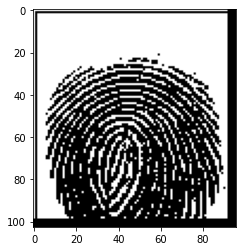

In [ ]:
bin = np.array(img)
for i in range(103):
  for j in range(96):
    if img_array[i,j,0]<=127:
      bin[i,j]=[0,0,0]
    else:
      bin[i,j]=[255,255,255]
plt.imshow(bin)

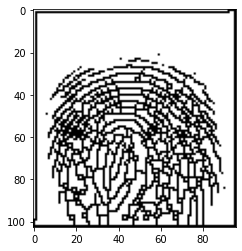

In [ ]:
thin = copy.deepcopy(bin)
dir=[[-1,-1],[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1],[0,-1]]

while(True):
  flag=1
  for i in range(103):
    for j in range(96):
      if thin[i,j,0]==0 and i>0 and i<102 and j>0 and j<95:
        a=0
        b01=0
        b10=0
        for k in dir:
          if thin[i+k[0],j+k[1],0]==0:
            a+=1
        for k in range(1,8):
          if thin[i+dir[k-1][0],j+dir[k-1][1],0]<thin[i+dir[k][0],j+dir[k][1],0]:
            b01+=1
          if thin[i+dir[k-1][0],j+dir[k-1][1],0]>thin[i+dir[k][0],j+dir[k][1],0]:
            b10+=1
        if thin[i+dir[0][0],j+dir[0][1],0]<thin[i+dir[7][0],j+dir[7][1],0]:
          b10+=1
        if thin[i+dir[0][0],j+dir[0][1],0]>thin[i+dir[7][0],j+dir[7][1],0]:
          b01+=1
        if a>=2 and a<=6 and (b01==1 or b10==1):
          flag=0
          thin[i,j,0]=thin[i,j,1]=thin[i,j,2]=255
  # flag=1
  if flag:
    break

plt.imshow(thin)


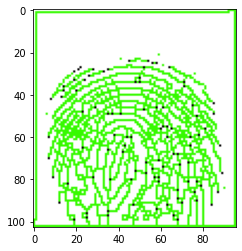

In [ ]:
minu = copy.deepcopy(thin)
li = []
while(True):
  flag=1
  for i in range(103):
    for j in range(96):
      if minu[i,j,0]==0 and i>0 and i<102 and j>0 and j<95:
        a=0 # no.of blacks
        b=0 # white to black
        for k in dir:
          if minu[i+k[0],j+k[1],0]==0:
            a+=1
        if a==1:
          li.append([i,j]) #
          continue
        prev=-1
        first=-1
        Max=0
        for k in range(1,9):
          if thin[i+dir[(k-1)%8][0],j+dir[(k-1)%8][1],0]>thin[i+dir[k%8][0],j+dir[k%8][1],0]:
            if(prev!=-1):
              Max=max(Max,k-prev)
            else:
              prev=k
              first=k
            b+=1
        Max=max(Max,abs(prev%8-first%8))
        if a==3 and b==3:
          li.append([i,j]) #
          continue
        # minu[i,j,0]=minu[i,j,1]=200
        flag=0   
  flag=1
  if flag:
    break


for i in range(103):
    for j in range(96):
      if minu[i,j,0]==0:
        minu[i,j]=[54,250,0]
for k in li:
  minu[k[0],k[1]]=[0,0,0]
plt.imshow(minu)



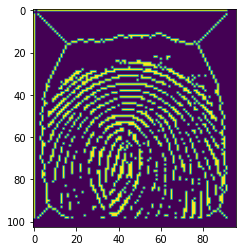

In [ ]:
img1 = cv2.imread('1.BMP',0)
size = np.size(img1)
skel = np.zeros(img1.shape,np.uint8)
 
ret,img1 = cv2.threshold(img1,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img1,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img1,temp)
    skel = cv2.bitwise_or(skel,temp)
    img1 = eroded.copy()
 
    zeros = size - cv2.countNonZero(img1)
    if zeros==size:
        done = True
 
# cv2.imshow("skel",skel)
plt.imshow(skel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

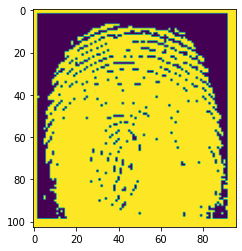

In [ ]:
# from PIL import ImageOps

# # img = Image.open('1.BMP').convert('L')
# i_img = ImageOps.invert(img)

# i_img_array = np.array(i_img)
# i_img_array[i_img_array > 0] = 1

# plt.imshow(i_img_array)

-----------------**Week 3**----------------

In [1]:
import keras
from keras.datasets import imdb
imdb = keras.datasets.imdb

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [8]:
# from keras.datasets import imdb
# Using TensorFlow backend.
# (x_train, y_train), (x_test, y_test) = imdb.load_data()
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [9]:
from keras.preprocessing.sequence import pad_sequences

#pad all input sequences to have the length of 100

X_train = pad_sequences(x_train, maxlen=100)
X_test = pad_sequences(x_test, maxlen=100)

In [10]:
print(x_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [11]:
#import Sequential model
from keras import models
#create Keras model
model = models.Sequential()

In [12]:
#import Embedding layer
from keras.layers import Embedding

#first hidden layer is an embedding layer
model.add(Embedding(100000, 128))

In [13]:
#import LSTM layer
from keras.layers import Embedding, LSTM


#second hidden layer is an LSTM  layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

In [14]:
from keras.layers import Dense, Embedding, LSTM

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# fit model on training set and check the accuracy on validation set.
model.fit(X_train, y_train, batch_size=10, epochs=5,
          validation_data=(X_test, y_test))

Epoch 1/5
  24/2500 [..............................] - ETA: 14:24 - loss: 0.2962 - accuracy: 0.8875